### https://dacon.io/competitions/open/235610/overview/description

# 데이터
index 구분자 <br>
quality 품질<br>
fixed acidity 산도<br>
volatile acidity 휘발성산<br>
citric acid 시트르산<br>
residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분<br>
chlorides 염화물<br>
free sulfur dioxide 독립 이산화황<br>
total sulfur dioxide 총 이산화황<br>
density 밀도<br>
pH 수소이온농도<br>
sulphates 황산염<br>
alcohol 도수<br>
type 종류


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [10]:
print('품질 최고 : {}'.format(train['quality'].max()))
print('품질 최저 : {}'.format(train['quality'].min()))
print('품질 평균 : {:.2f}'.format(train['quality'].mean()))

품질 최고 : 9
품질 최저 : 3
품질 평균 : 5.82


#### 산도(fixed acidity)에 따른 품질

In [19]:
print('산도 최고 : {}'.format(train['fixed acidity'].max()))
print('산도 최저 : {}'.format(train['fixed acidity'].min()))
print('산도 평균 : {:.2f}'.format(train['fixed acidity'].mean()))

산도 최고 : 15.9
산도 최저 : 3.8
산도 평균 : 7.21


In [27]:
train[['quality', 'fixed acidity']].groupby(['quality'], as_index=True).mean()

,fixed acidity
quality,
3,7.811538
4,7.269892
5,7.329195
6,7.166743
7,7.123972
8,6.839474
9,7.420000


In [41]:
train.groupby('quality').count()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,,
3,26,26,26,26,26,26,26,26,26,26,26,26,26
4,186,186,186,186,186,186,186,186,186,186,186,186,186
5,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788
6,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416,2416
7,924,924,924,924,924,924,924,924,924,924,924,924,924
8,152,152,152,152,152,152,152,152,152,152,152,152,152
9,5,5,5,5,5,5,5,5,5,5,5,5,5


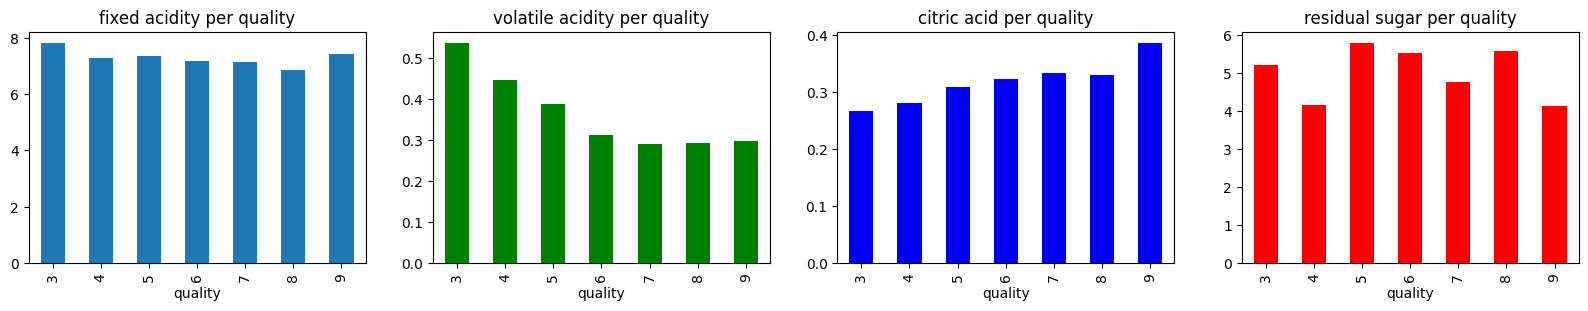

In [53]:
f, ax = plt.subplots(1,4,figsize=(20,3))

# 산도(fixed acidity)와 품질의 관계
train[['quality', 'fixed acidity']].groupby(['quality'], as_index=True).mean().plot.bar(ax = ax[0]) 
ax[0].set_title('fixed acidity per quality')
ax[0].legend().remove()
# => 산도가 높다거나 낮다고해서 품질의 값이 달라지지 않는다

# 휘발성산(volatile acidity)과 품질의 관계
train[['quality', 'volatile acidity']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[1], color='green')
ax[1].set_title('volatile acidity per quality')
ax[1].legend().remove()
# => 휘발성산이 높으면 품질이 낮다는 것을 볼 수 있음

# 시트르산(citric acid)과 품질의 관계
train[['quality', 'citric acid']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[2], color='blue')
ax[2].set_title('citric acid per quality')
ax[2].legend().remove()
# => 시트르산이 높으면 품질의 값도 높음

# 잔당(residual sugar)과 품질의 관계
train[['quality', 'residual sugar']].groupby(['quality'], as_index=True).mean().plot.bar(ax=ax[3], color='red')
ax[3].set_title('residual sugar per quality')
ax[3].legend().remove()
# => 잔당은 품질과 관련이 없다

